<a href="https://colab.research.google.com/github/cadred000/MAT421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dan Gibson - Module E Homework

## Continuity and Differentiation

In [ ]:
import sympy as sp

x, y, z, t, = sp.symbols('x y z t')
display(sp.diff(x**2 + sp.cos(x)**2 + sp.sin(x)*sp.exp(x)))

2*x + exp(x)*sin(x) + exp(x)*cos(x) - 2*sin(x)*cos(x)

In [ ]:
def is_continuous(f, a):
    left_lim = sp.limit(f, x, a, dir='-').doit()
    right_lim = sp.limit(f, x, a, dir ='+').doit()
    if left_lim != right_lim:
        print(f"The function {f} is not continuous at {a}")
        return False
    else:
        print(f"The function {f} is continuous at {a}")
        return True

f1 = x**2
f2 = sp.tan(x)

In [ ]:
is_continuous(f1, 5)

The function x**2 is continuous at 5


True

In [ ]:
is_continuous(f2, sp.pi/2)

The function tan(x) is not continuous at pi/2


False

## Taylor Theorem

x**2*(-1 - sin(1)/2 + cos(1)/2) + x*cos(1) + sin(1) + 1

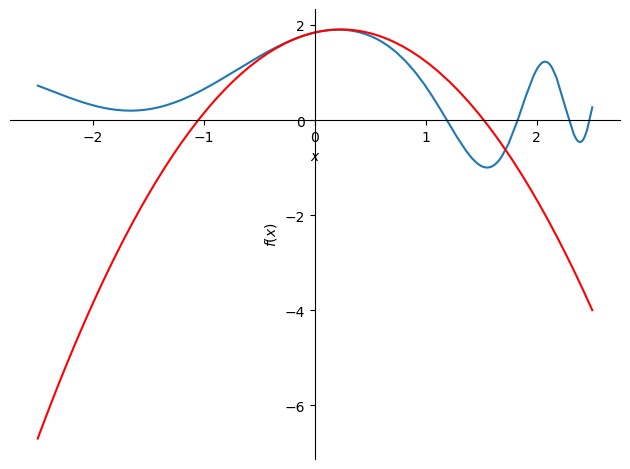

In [ ]:
f3 = sp.cos(x)**2 + sp.sin(sp.exp(x))

taylors_expansion = f3.series(x, 0, 3).removeO()
display(taylors_expansion)

p1 = sp.plot(f3, (x, -2.5, 2.5), show=False)
p2 = sp.plot(taylors_expansion, (x, -2.5, 2.5), show=False, line_color='red')
p1.extend(p2)
p1.show()

This plot shows that the taylors approximation function seems to match the behavior at zero.  Lets try for a different point.

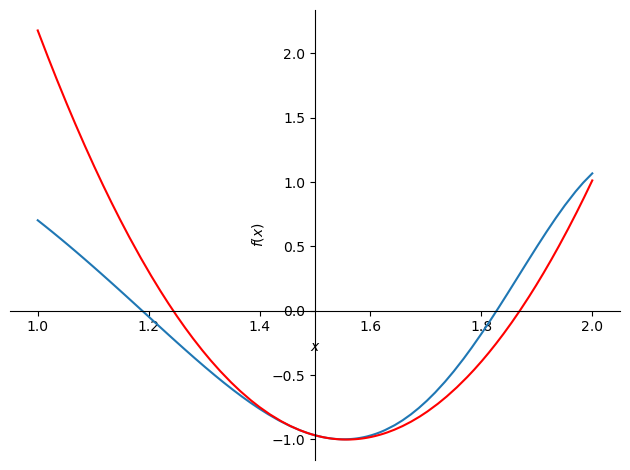

In [ ]:
taylors_expansion = f3.series(x, 1.5, 3).removeO()

p1 = sp.plot(f3, (x, 1, 2), show=False)
p2 = sp.plot(taylors_expansion, (x, 1, 2), show=False, line_color='red')
p1.extend(p2)
p1.show()

Seems to work great for other values as well.

## Optimization with Gradient Descent

sin(exp(x)) + cos(x)**2

The minimum of the function is at x = 1.5519
The value at that location is -0.999611


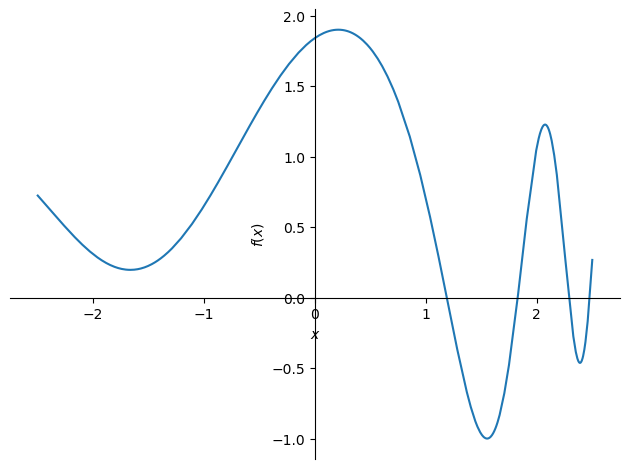

In [ ]:
import scipy as sc
import numpy as np

f = lambda x: np.cos(x)**2 + np.sin(np.exp(x))

answer = sc.optimize.minimize(f, 1)

location = answer.x[0]
value = answer.fun

display(f3)
print(f"The minimum of the function is at x = {location:.4f}\nThe value at that location is {value:4f}")
sp.plot(f3, (x, -2.5, 2.5))

Now let's use the gradient descent algorithm

In [ ]:
x_sym = sp.symbols('x')

grad_f3 = sp.lambdify(x_sym, sp.diff(f3, x_sym), 'numpy')

x = 3

for i in range(1000):
    grad = grad_f3(x)
    x_new = x - 0.1 * grad
    if abs(x - x_new) < 1e-6:
        break
    x = x_new

y = f(x)
display(f3)
print(f"Using gradient descent, the minimum has been found to be at the point ({x:.4f},{y:.4f})")

sin(exp(x)) + cos(x)**2

Using gradient descent, the minimum has been found to be at the point (1.6802,-0.7815)
